# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 3 : Maximum Likeihood Estimation, Linear Regression </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> August 29, 2018 </center>

# COMP 562 – Lecture 3

Plan for today

1. Review likelihood, log-likelihood, maximum likelihood estimates
2. Compute maximum likelihood estimate for a Gaussian model
3. Introduce linear regression
4. Introduce gradient ascent/descent methods

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\loglik}{\log\mathcal{L}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ | }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
$$

# Last Time -- Distributions

Last time we reviewed probability distributions of one dimensional random variables:
* Bernoulli (coin toss), Binomial (count of heads in multiple coin tosses)
* Categorical (die roll), Multinomial (count of different die sides in multiple rolls)

Continuous distributions:
* Gaussian 
* Laplace


# Last Time -- Likelihood

We introduced **likelihood** function, which tells us how well our model fits the data for particular parameters

$$
\likelihood(\theta|\xx) = p(\underbrace{\xx}_{\Data}  \given \underbrace{\theta}_{\textrm{parameters}})
$$

It is common to assume the training examples are independent and identically distributed,commonly abbreviated to **i.i.d.**, hence:

$$
\likelihood(\theta|\xx) = \prod_i p(x_i | \theta)
$$

An example of model

$$
p(x|\theta) = \theta^x(1-\theta)^{1-x}
$$

Given data $\xx = \{0,1,1,1\}$, the likelihood function is defined as

$$
\likelihood(\theta\given\xx) = \prod_i p(x_i\given\theta) =  p(x_1\given\theta)p(x_2\given\theta)p(x_3\given\theta)p(x_4\given\theta) = (1-\theta)\theta^3
$$

# Last Time -- Log-Likelihood

We introduced log-likelihood function

$$
\loglik(\theta\given\Data).
$$

Given data $\Data=\{0,0,0,1\}$ and model $p(x\given\theta) = \theta^x(1-\theta)^{1-x}$ 

**<font color='red'> Q: Which is more likely (better fit the data) $\theta = 0.25$ or $\theta = 0.99$ </font>**

In [43]:
import numpy
from __future__ import print_function
def likelihood(theta,xs):
    p = 1.0
    for x in xs:
        p = p*theta**x * (1-theta)**(1-x)
    return p

xs = [0,0,0,1]
theta1 = 0.99
theta2 = 0.25
loglik1 = numpy.log(likelihood(theta1,xs))
loglik2 = numpy.log(likelihood(theta2,xs))
print("Log-Likelihood(",theta1,"|",xs, ")=",loglik1)
print("Log-Likelihood(",theta2,"|",xs, ")=",loglik2)

Log-Likelihood( 0.99 | [0, 0, 0, 1] )= -13.825560893817773
Log-Likelihood( 0.25 | [0, 0, 0, 1] )= -2.2493405784752336


$$
-2.25= \loglik(0.25\given\xx) > \loglik(0.99\given\Data) = -13.83
$$

# Last Time -- Maximum Likelihood Estimate (MLE)

We talked about finding a mazimizer of the log-likelihood called **Maximum Likelihood Estimate** (MLE)

$$
\theta^{\MLE} = \arg\max_{\theta} \loglik(\theta\given\Data)
$$

which can be interepreted as the parameter for which the data is most probable under the model

We recalled that in order to maximize a functions, $f(x)$, we finding $x$ for which

$$
\frac{\partial}{\partial x} f(x) = 0.
$$

We used this approach to find MLE for a Bernoulli model 

$$
p(x\given\theta) = \theta^x(1-\theta)^{1-x}
$$

and came up with

$$
\theta^{\MLE} = \frac{
\overbrace{ \sum_i [x_i = 1] }^{ \textrm{count of 1s in data} } }{ \underbrace{
 \sum_i [x_i = 1]
 }_{\textrm{count of 1s in data} } + 
 \underbrace{
  \sum_i [x_i = 0]
 }_{\textrm{count of 0s in data}}}
$$

# Finding $\mu^{MLE}$ of Gaussian Distribution

We left as an exercise a problem to come up with a maximum likelihood estimate for parameter $\mu$ of a Gaussian distribution

$$
p(x\given\mu,\sigma^2)= \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
$$

So we will do that now

Likelihood function is

$$
\likelihood(\mu,\sigma^2\given\xx) = \prod_{i=1}^N p(x_i\given\mu,\sigma^2) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}
$$

Log-likelihood function is

$$
\log\likelihood(\mu,\sigma^2\given\xx) = \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2} =  \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2} -\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$

# Finding $\mu^{MLE}$ of Gaussian Distribution

Our recipe is:

1. Take the function you want to maximize: 

$$
f(\mu) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$

2. Compute its first derivative: $\frac{\partial}{\partial \mu} f(\mu)$
3. Equate that derivative to zero and solve: $\frac{\partial}{\partial \mu} f(\mu) = 0$



The first derivative is

$$
\frac{\partial}{\partial \mu} f(\mu) = \sum_{i=1}^N \left[ \frac{1}{\sigma^2}(x_i - \mu)\right]
$$

We equate it to zero and solve

$$
\sum_{i=1}^N \left[ \frac{1}{\sigma^2}(x_i - \mu)\right] = 0
$$

# Finding $\mu^{MLE}$ of Gaussian Distribution

$$
\begin{aligned}
\sum_{i=1}^N \left[ - \frac{1}{\sigma^2}(x_i - \mu)\right] &= 0\\
\sum_{i=1}^N \frac{1}{\sigma^2}(x_i - \mu) &= 0\\
\sum_{i=1}^N (x_i - \mu) &= 0\\
\end{aligned}
$$

$$
\begin{aligned}
\sum_{i=1}^N x_i &= \sum_i \mu \\
\sum_{i=1}^N x_i &= \mu \sum_i 1 \\
\frac{\sum_{i=1}^N x_i}{\sum_{i=1}^N 1} &= \mu \\
\frac{\sum_{i=1}^N x_i}{N} &= \mu
\end{aligned}
$$

# Finding ${\sigma^{2}}^{MLE}$ of Gaussian Distribution

Our recipe is:

1. Take the function you want to maximize: 

$$
f(\sigma^{2}) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$

2. Compute its first derivative: $\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2})$
3. Equate that derivative to zero and solve: $\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2}) = 0$


$$
f(\sigma^{2}) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right] = - \frac{N}{2}\log{2\pi} - \frac{N}{2}\log{\sigma^2} - \frac{1}{2\sigma^2} \sum_{i=1}^N \left[(x_i-\mu)^2\right]
$$

The first derivative is

$$
\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2}) = - \frac{N}{2\sigma^{2}} -  \left(\frac{1}{2} \sum_{i=1}^N \left[{(x_i - \mu)}^{2}\right]\right)\frac{\partial}{\partial \sigma^{2}}\left(\frac{1}{\sigma^{2}}\right) \\
= - \frac{N}{2\sigma^{2}} -  \left(\frac{1}{2} \sum_{i=1}^N \left[{(x_i - \mu)}^{2}\right]\right)\left(-\frac{1}{{(\sigma^{2})}^{2}}\right) = \frac{1}{2\sigma^{2}} \left(\frac{1}{\sigma^{2}} \sum_{i=1}^N \left[{(x_i - \mu)}^{2} \right] - N \right)
$$

Which, if we rule out $\sigma^{2} = 0$, is equal to zero only if 

$$
\sigma^{2} = \frac{1}{N} \sum_{i=1}^N \left[{(x_i - \mu)}^{2} \right]
$$

**<font color='red'> Please Verify both ${\mu}^{MLE}$ and ${\sigma^{2}}^{MLE}$ using seconed derivative test </font>**


# Using MLE Estimates in Prediction

What can we do with maximum likelihood estimates?

We can predict outcome of the next experiment:

* Given data $\{1,0,1,1,0,0,0,0,0\}$ and assuming Bernoulli model

* $\theta^{\MLE}$ is $\frac{3}{3 + 5} = \frac{3}{8}$

* Then probability that the next experiment will yield $x=1$ is $\frac{3}{8}$

* Given heights of 6th graders in inches $\{56,57,59,63,55,61\}$ and assuming Gaussian model

* $\mu^{\MLE} = 58.5$ and ${\sigma}^{MLE} = 3.082$

* Hence, probability that the next 6th grader will be of height 58.5 $\pm$ 2*3.082  is 0.95

<img src="./Images/Standard_deviation_diagram.png" width="600" align="center"/>

Given realizations of the same random variable we can estimate what the next draw might look like

**<font color='red'> Q: Suppose you wanted to predict a student's grade in COMP 562? What would you do? </font>**

# Linear Regression

One of the simplest examples of supervised learning is **linear regression**

Aim to model the relationship between an outcome variable $y$ (a.k.a dependent variable or response variable), and a vector of explanatory variables $\mathbf{x}=(x_1,x_2,…,x_N)$ (independent variables, covariates, or features)

For example, we can try to predict student's grade in COMP562 class using grades from prereq's and number of beers a student has each week

$$
\begin{aligned}
\textrm{COMP562} &=  0.25 + 0.2*\textrm{COMP410} + 0.3*\textrm{MATH233} + 0.5*\textrm{STOR435} - 0.1* \textrm{beers} + \epsilon
\end{aligned}
$$

Where, 

$$
\begin{aligned}
\epsilon &\sim \mathcal{N}(0, 0.1)
\end{aligned}
$$

Formally, we would write

$$
\begin{aligned}
y &= \beta_0 + \sum_j x_j \beta_j + \epsilon \\
\epsilon &\sim \Gaussian{0}{\sigma^2}
\end{aligned}
$$

or more compactly

$$
y \given \xx \sim \Gaussian{\beta_0 + \sum_j x_j \beta_j}{ \sigma^2}
$$

Notice that the function is linear in the parameters $\beta=(\beta_0,\beta_1,…,\beta_p)$, not necessarily in terms of the covariates

# Linear Regression

Taking a closer look at the model:

$$
y \given \xx \sim \Gaussian{\beta_0 + \sum_{j=1}^p x_j \beta_j}{ \sigma^2}
$$

* $y$ is a target variable we are modeling 
* $\xx$ is a vector of $p$ features (aka predictors and covariates)
* $\beta_0$ is a **bias** which does not depent on the features
* $\beta_1,\dots,\beta_p$ is a vector of weights (one per feature)
* $\sigma^2$ is variance -- how far can we expect $y$ to be away from $\beta_0 + \sum_{j=1}^p x_j \beta_j$

**<font color='red'> Q: Which of these items above are parameters? Hint: Which values can we adjust to get a better prediction?</font>**

$$
\begin{aligned}
\textrm{COMP562} &=  0.25 + 0.2*\textrm{COMP410} + 0.3*\textrm{MATH233} + 0.5*\textrm{STOR435} - 0.1* \textrm{beers} + \epsilon \\
\end{aligned}
$$


# Linear Regression

Probability of target variable $y$

$$
p(y\given\xx,\beta_0,\beta,\sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-\underbrace{(\beta_0 + \sum_j x_j \beta_j)}_{\textrm{mean of the Gaussian}}\right)^2\right\}
$$

In the case of the 6th grader's height, we made **the same** prediction for any other 6th grader (58.5 inches)

In our COMP 562 grade example, we compute a potentially different mean for every student

$$
\beta_0 + \beta_{\textrm{COMP410}}*\textrm{COMP410} + \beta_{\textrm{MATH233}}*\textrm{MATH233} + \beta_{\textrm{STOR435}}*\textrm{STOR435} + \beta_{\textrm{beers}}* \textrm{beers} 
$$


# Linear Regression -- Toy Example

We can try to fit this model to some data (**not real UNC data**)

In [44]:
import pandas 

X = numpy.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

y = numpy.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

#Creating pandas dataframe from numpy array
dataset = pandas.DataFrame({'x_1:COMP410':X[:,0],'x_2:MATH233':X[:,1],'x_3:STOR345':X[:,2],'x_4:#beers':X[:,3],'y:COMP562':y})
dataset.head()

,x_1:COMP410,x_2:MATH233,x_3:STOR345,x_4:#beers,y:COMP562
0,3.0,3.0,4.0,0.0,4.0
1,3.0,3.0,3.0,0.0,3.0
2,3.0,2.0,2.0,5.0,2.0
3,2.0,2.0,4.0,0.0,3.0
4,3.0,3.0,4.0,4.0,3.0


[4. 3. 2. 3. 3. 4. 3. 2. 3. 3. 3. 3. 2. 2. 3. 2. 3. 3. 3. 3.]


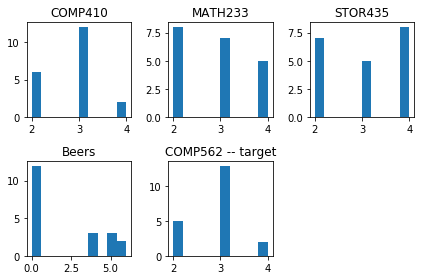

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
features = ['COMP410','MATH233','STOR435','Beers']
for j in range(X.shape[1]):    
    plt.subplot(2,3,j+1)
    plt.hist(X[:,j])
    plt.title(features[j])

plt.subplot(2,3,5)
print(y)
plt.hist(y)
plt.title('COMP562 -- target')
plt.tight_layout()  # ensure sensible layout of subplots


# Linear Regression -- Toy Example

Our goal is to fit the model that predicts COMP 562 grade

Our prediction is based on

$$
\begin{aligned}
\textrm{COMP562} &=  \beta_0 + \beta_{\textrm{COMP410}}*\textrm{COMP410} + 
\beta_{\textrm{MATH233}}*\textrm{MATH233} \\
&+ \beta_{\textrm{STOR435}}*\textrm{STOR435} + 
\beta_{\textrm{beers}}* \textrm{beers} + \epsilon \\
\end{aligned}
$$

In order to make a prediction we need 

* $\beta_0$ -- bias or grade you get regardless of your other grades
* $\beta_{\textrm{COMP410}}$ 
* $\beta_{\textrm{MATH233}}$ 
* $\beta_{\textrm{STOR435}}$ 
* $\beta_{\textrm{beers}}$ 

Note that having $\sigma^2$ would enable us to give a range of grades that cover 95% of the probability

# Linear Regression -- Likelihood

We start by writing out a likelihood for linear regression is

$$
\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) = 
\prod_{i=1}^N p(y\given\xx,\beta_0,\beta,\sigma^2) = 
\prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right\}
$$

Log-likelihood for linear regression is

$$
\log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right] \\ = - \frac{N}{2}\log(2\pi\sigma^2) -\frac{1}{2\sigma^2} \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2 =  - \frac{N}{2}\log(2\pi\sigma^2) -\frac{RSS}{2\sigma^2} 
$$


We will refer to expression $y_i-(\beta_0 + \sum_j x_j \beta_j)$ as **residual**, and hence **RSS** stands for **residual sum of squares** or **sum of squared errors** and is defined by 

$$
RSS = \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$

And RSS/N is called the **mean squared error** or **MSE**

$$
MSE = \frac{1}{N}\sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$

Hence, maximizing log-likelihood is equivalent to minimizing RSS or MSE

Our goal is still to find $\beta_0,\beta$ such that

$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) &= 0 \\
\frac{\partial}{\partial \beta_1} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) &= 0 \\
\cdots&\\
\frac{\partial}{\partial \beta_p} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) &= 0
\end{aligned}
$$

Because that will guarantee the parameters can not be further changed to improve the likelihood

# Introducing Gradient Ascent

Previously, we solved  equations of type $\frac{\partial}{\partial \theta} \loglik(\theta\given\Data) = 0$ in a closed-form

Here, we will develop a different approach using numerical optimization

Let's first consider how we can maximize a univariate differentiable function $f(x)$ iteratively

Text(2.5,-10,'Linear\napproximation')

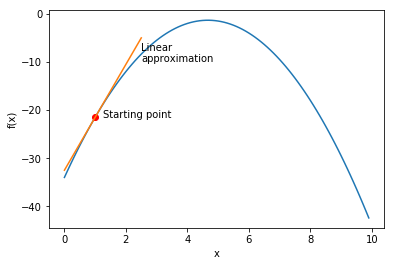

In [46]:
x = numpy.arange(0.0,10.0,0.1)
f = -(x-4.0)**2.0 - 0.5*(x-6.0)**2.0
dfdx = -(x-4.0)*2 - (x-6.0)
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x[10],f[10],'ro')
plt.annotate('Starting point',(x[10]+0.25,f[10]))
x1 = x[10]-1
x2 = x[10]+1.5
f1 = f[10]-dfdx[10]*1
f2 = f[10]+dfdx[10]*1.5
plt.plot([x1,x2],[f1,f2])
plt.annotate('Linear\napproximation',(x2,f2-5))

**<font color='red'> Q: Starting from the labeled point, should we increase or decrease $x$ to get to the maximum of function $f(x)$? Why? </font>**

Another way to see this is to consider a very simplified version of Taylor's theorem

**Theorem.** Given a function $f(\cdot)$ which is smooth at $x$

$$
f(x + d) = f(x) + f'(x)d + O(d^2)
$$

In words, close to $x$ function $f(\cdot)$ is very close to being a linear function of $d$

$$
f(x + \color{blue}{d}) = f(x) + f'(x)\color{blue}{d}
$$

Slope of the best linear approximation is $f'(x)$, i.e.,$\hspace{0.5em}$$f'(x)$ tells us in which direction function grows

 <img src="./Images/Derivative.gif" width="700" align="center"/> 


Multivariate functions are a bit harder to visualize, so we view them like topographical maps

Contours connect nearby points with the same altitutde (function value)

<img src="./Images/Topographic_Image.png"  width="1400" align="center"/> 

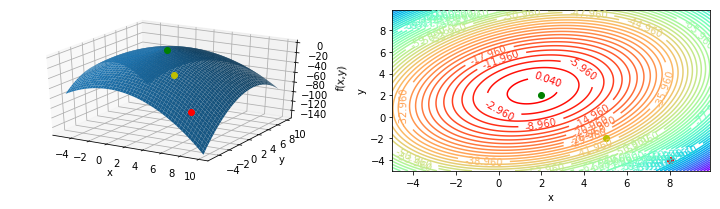

In [47]:
import matplotlib.cm as cm
x = numpy.arange(-5.0,10.0,0.1)
y = numpy.arange(-5.0,10.0,0.1)
X,Y = numpy.meshgrid(x,y)
F = -(X-1.0)**2.0 - (Y-2.0)**2.0 + 0.5*X*Y
fig = plt.figure(figsize=plt.figaspect(0.35))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,F)
plt.tight_layout(6.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.plot([x[130]],[y[10]],[F[130,10]],'ro')
ax.plot([x[70]],[y[70]],[F[70,70]],'go')
ax.plot([x[100]],[y[30]],[F[100,30]],'yo')
ax = fig.add_subplot(1,2,2)
C = ax.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),3),cmap=plt.cm.rainbow)
ax.clabel(C, inline=4, fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x[130],y[10],'ro')
ax.plot(x[70],y[70],'go')
ax.plot(x[100],y[30],'yo')

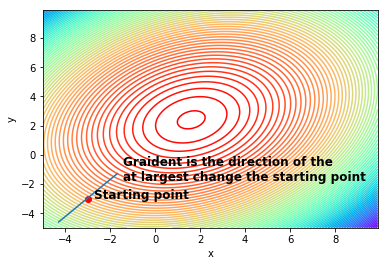

In [48]:
import matplotlib.cm as cm
x = numpy.arange(-5.0,10.0,0.1)
y = numpy.arange(-5.0,10.0,0.1)
X,Y = numpy.meshgrid(x,y)
F = -(X-1.0)**2.0 - (Y-2.0)**2.0 + 0.5*X*Y
dfdx = -2.0*(X-1.0) + 0.5*Y
dfdy = -2.0*(Y-2.0) + 0.5*X
C = plt.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),2),cmap=plt.cm.rainbow)
#ax.clabel(C, inline=4, fontsize=10)
plt.annotate('Starting point',(x[20]+0.25,y[20]),fontsize=12,fontweight='bold')
plt.plot(x[20],y[20],'ro')
x1 = x[20] -0.2*dfdx[20,20]
y1 = y[20] -0.2*dfdy[20,10]
x2 = x[20] +0.2*dfdx[20,20]
y2 = y[20] +0.2*dfdy[20,20]
plt.annotate('Graident is the direction of the \nat largest change the starting point',(x2+0.25,y2-0.5),fontsize=12,fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([x1,x2],[y1,y2])

Much as in the case of univariate function, the direction in which the function changes is described by derivatives

A vector composed of partial derivatives of a function is called gradient

$$
\nabla f(\xx) = \left[\begin{array}{c} \frac{\partial}{\partial x_1} f(\xx) \\  \vdots \\ \frac{\partial}{\partial x_p} f(\xx) \end{array}\right]
$$

For example,

$$
f(x,y) = -(x-1)^2 - (y- 2)^2 + \frac{1}{2}xy
$$

has gradient

$$
\nabla f(x,y) = \left[\begin{array}{c} -2(x-1) + \frac{1}{2}y \\ -2(y-2) + \frac{1}{2}x \end{array}\right]
$$

Gradient points in the direction of the largest change in the function

**<font color='red'> Q: Can you come up with an algorithm that would use the gradients to maximize a function? </font>**

Gradients are important because:

1. They can tell us when we have reached an optimum ($\nabla f(\xx) = 0$)
2. Point in the direction in which function is changing the most

So, we shouldn't mess them up

To check your gradient go back to the definition:

$$
\frac{\partial}{\partial x_1} f(x_1,\dots,x_p) = \lim_{\delta \rightarrow 0} \frac{f(x_1 + \delta/2,\dots,x_p) - f(x_1 - \delta/2,\dots,x_p)}{\delta}
$$

Left side can be numerically approximated using a small $\delta=10^{-6}$:

$$
\frac{f(x_1 + 0.5\delta,\dots,x_p) - f(x_1 - 0.5\delta,\dots,x_p)}{\delta}
$$

This is called **finite difference approximation**, let's see this in practice

In [49]:
def grad_check(f,xy0,delta=1e-6,tolerance=1e-7):
    f0,g0 = f(xy0)
    p = len(xy0)
    finite_diff = numpy.zeros(p)
    gradient_correct = True
    for i in range(p):
        xy1 = numpy.copy(xy0)
        xy2 = numpy.copy(xy0)
        xy1[i] = xy1[i] - 0.5*delta
        xy2[i] = xy2[i] + 0.5*delta
        f1,_ = f(xy1)
        f2,_ = f(xy2)
        finite_diff = (f2 - f1)/(delta)
        if (abs(finite_diff - g0[i])>tolerance):
            print("Broken partial",i," Finite Diff: ",finite_diff," Partial: ",g0[i])
            gradient_correct = False
    return gradient_correct
def f_broken(xy):
    x = xy[0]
    y = xy[1]
    f = -(x-1.0)**2.0 - (y-2.0)**2.0 + 0.5*x*y
    dfdx = -2.0*(x-1.0) + 0.5*y
    dfdy = -2.0*(y-2.0) - 0.5*x
    grad = [dfdx,dfdy]
    return f,grad
def f_correct(xy):
    x = xy[0]
    y = xy[1]
    f = -(x-1.0)**2.0 - (y-2.0)**2.0 + 0.5*x*y
    dfdx = -2.0*(x-1.0) + 0.5*y
    dfdy = -2.0*(y-2.0) + 0.5*x
    grad = [dfdx,dfdy]
    return f,grad
xy = numpy.asarray([1.0,1.0]) 
print("f_broken has correct gradient:", grad_check(f_broken,[1.0,1.0])) 
print("f_correct has correct gradient:", grad_check(f_correct,[1.0,1.0]))


Broken partial 1  Finite Diff:  2.500000000349445  Partial:  1.5
f_broken has correct gradient: False
f_correct has correct gradient: True


Once we are sure that the gradients are correct, we can proceed to optimize the function

To do that, we use **gradient ascent (GA)** or **gradient descent (GD)** depending on whether we are maximizing or minimizing a function

Recall that we have $f : \mathbb{R}^{n} \rightarrow \mathbb{R}$, convex and differentiable

We want to solve
$$
\begin{aligned}
GA: \, \mathop{\textrm{argmax}}_{\mathbf{\theta} \in \mathbb{R}^{n}} f(\mathbf{\theta}) \; \; \; \; \; \; GD: \, \mathop{\textrm{argmin}}_{\mathbf{\theta} \in \mathbb{R}^{n}} f(\mathbf{\theta})
\end{aligned}
$$

<img src="./Images/OptimizationProblems.png"  align="center"/> 


* Gradient Ascent\Descent: Choose initial ${\mathbf{\theta}^{(0)}} \in \mathbb{R}^{n}$, repeat:
$$  \;
\begin{aligned}
{\mathbf{\theta}^{(k)}} = {\mathbf{\theta}^{(k-1)}} \pm t_{k}.\nabla f({\mathbf{\theta}^{(k-1)}}), k =1,2,3,\ldots
\end{aligned}
$$
Where $t_{k}$ is the step size (learning rate) at step $k$

* Stop at some point using a stopping criteria (depend on the problem we are solving), for example:
 * Maximum number of iterations reached
 * $| f({\mathbf{\theta}^{(k)}}) − f({\mathbf{\theta}^{(k-1)}}) | < \epsilon$
 
<img src="./Images/GD.gif"  align="center"/> 

 **<font color='red'> Q: What would you change for gradient descent? How would you specify the learning rate $(t_{k})$?</font>**

Choosing a step size or learning rate ($t_{k}$)

1. Fixed step size
 * Simply take $t_{k} = t$ $\forall$ $k$
 * However, can diverge if $t$ is too large, and convergence can be slow if $t$ is too small
 
 <img src="./Images/LearningRate.gif"  align="center"/> 

2. Use Line search Strategy
 * At each iteration, do the best you can along the direction of the gradient,
 
 $$
\begin{aligned}
t = \mathop{\textrm{argmax}}_{s \geq 0} f(\mathbf{\theta} + s.\nabla f({\mathbf{\theta}}))
\end{aligned}
 $$
 
  <img src="./Images/Line_Search1.gif"  align="center"/> 
  
 * Usually, it is not possible to do this minimization exactly, and approximation methods are used
 * Backtracking Line Search: 
     * Choose an initial learning rate ($t_{k} = t_{init})$, and update your parameters ${\mathbf{\theta}^{(k)}} = {\mathbf{\theta}^{(k-1)}} \pm t_{k}.\nabla f({\mathbf{\theta}^{(k-1)}})$ 
     * Reduce learning rate $t_{k} = \alpha . t_{init}$, where  $0< \alpha <1 $
     * Repeat by reducing $\alpha$ till you see an improvmnet in $f({\mathbf{\theta}^{(k)}})$

In [50]:
def gradient_ascent(f,theta,init_step,iterations):  
    f_val,grad = f(theta)                       # compute function value and gradient 
    f_vals = [f_val]
    for it in range(iterations):                # iterate for a fixed number of iterations
        done = False                            # initial condition for done
        line_search_it = 0                      # how many times we tried to shrink the step
        step = init_step                        # reset step size to the initial size
        while not done and line_search_it<100:  # are we done yet?
            new_theta = theta + step*grad       # take a step along the gradient
            new_f_val,new_grad = f(new_theta)   # evaluate function value and gradient
            if new_f_val<f_val:                 # did we go too far?
                step = step*0.95                # if so, shrink the step-size
                line_search_it += 1             # how many times did we shrank the step
            else:
                done = True                     # better than the last theta, so we move on
        
        if not done:                            # did not find right step size
            print("Line Search failed.")
        else:
            f_val = new_f_val                   # ah, we are ok, accept the new theta
            theta = new_theta
            grad = new_grad
            f_vals.append(f_val)
        plt.plot(f_vals)
    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    return f_val, theta        

# Linear Regression -- Likelihood

We start by writing out a likelihood for linear regression is

$$
\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) = 
\prod_{i=1}^N p(y\given\xx,\beta_0,\beta,\sigma^2) = 
\prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right\}
$$

Log-likelihood for linear regression is

$$
\log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right].
$$



# Linear Regression -- Gradient of Log-Likelihood

Partial derivatives

$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy)  &= \sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-1)\\
\frac{\partial}{\partial \beta_k} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy)  &= \sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-x_k)&,k\in\{1,\dots,p\}
\end{aligned}
$$

Hence gradient (with respect to $\beta$s)
$$
\nabla \loglik(\beta_0,\beta,\sigma^2\given\xx,\yy) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_j \beta_j)\right)(-x_1) \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-x_p)
\end{array}
\right]
$$

In [51]:
X = numpy.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

Y = numpy.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

def linear_regression_log_likelihood(Y,X,betas,sigma2=1.0):
    ll = 0
    beta0 = betas[0]
    beta = betas[1:]
    dlldbeta0 = 0
    dlldbeta = numpy.zeros(len(beta))    
    for (x,y) in zip(X,Y):
        ll = ll -0.5*numpy.log(2*numpy.pi*sigma2)        
        res = y - beta0 - numpy.sum(x*beta)
        ll = ll - 1.0/(2.0*sigma2)*(res**2.0)
        dlldbeta0 = dlldbeta0 - 1.0/sigma2*res*(-1)
        dlldbeta = dlldbeta - 1.0/sigma2*(res*(-x))
    grad = numpy.zeros(len(beta)+1)
    grad[0] = dlldbeta0
    grad[1:] = dlldbeta
    return ll, grad

init_beta = [0.1]*5
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
grad_check(f,init_beta)

True

# Fitting Linear Regression Using Gradient Ascent

We are now ready to optimize our model

We will aim to find maximum of the log-likelihood function using the gradient ascent algorithm 
we implemented

Beta 0 = 0.2208399107471998
Beta COMP410 = 0.27826872083818793
Beta MATH233 = 0.3612567247447311
Beta STOR435 = 0.34750079031358333
Beta Beers = -0.1310460747774247


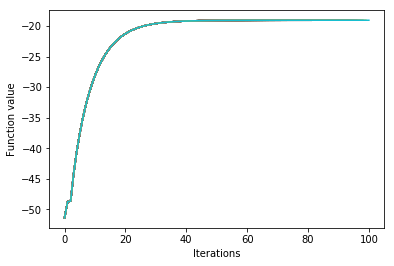

In [52]:
init_beta = [0.1]*5
init_step = 0.01
iterations = 1000
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
[f_best,betas_mle] = gradient_ascent(f,init_beta,0.01,100)
names = ['0','COMP410','MATH233','STOR435','Beers']
for (name,beta) in zip(names,betas_mle):
    print('Beta',name,'=',beta)

# Today

* Introduced linear regression
* Introduced gradient ascent/descent
* Implemented linear regression log-likelihood and gradient ascent
* Fit a simple model for COMP 562 grades